**Import Data**

Data yang dipakai adalah file csv, data virus covid19

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetcovid19.csv to datasetcovid19.csv


In [ ]:
import pandas as pd                      # pandas table
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
import io
df= pd.read_csv(io.BytesIO(uploaded['datasetcovid19.csv']), 
                names=['Day', 'Date', 'Positif_perhari', 'Sembuh_perhari','Kematian_perhari',
                       'Total_positif','Total_Sembuh','Total_Kematian'],header=0)
# Dataset is now stored in a Pandas Dataframe00
df.head(47)

,Day,Date,Positif_perhari,Sembuh_perhari,Kematian_perhari,Total_positif,Total_Sembuh,Total_Kematian
0,1,3/2/2020,2,0,0,2,0,0
1,2,3/3/2020,0,0,0,2,0,0
2,3,3/4/2020,0,0,0,2,0,0
3,4,3/5/2020,0,0,0,2,0,0
4,5,3/6/2020,2,0,0,4,0,0
5,6,3/7/2020,0,0,0,4,0,0
6,7,3/8/2020,2,0,0,6,0,0
7,8,3/9/2020,13,0,0,19,0,0
8,9,3/10/2020,8,2,0,27,2,0
9,10,3/11/2020,7,0,1,34,2,1


**Memilih kolom yang akan diolah**

X dan Y sudah ditentukan sebelumnya yaitu X adalah Day dan Y adalah Positif_perhari

In [ ]:
df_dataset = df[['Day', 'Positif_perhari']]
df_dataset.head(47) 

,Day,Positif_perhari
0,1,2
1,2,0
2,3,0
3,4,0
4,5,2
5,6,0
6,7,2
7,8,13
8,9,8
9,10,7


**Data ditampilkan kedalam bentuk grafik**

yang dimana X adalah Day dan Y adalah Positif perhari. Grafik ditampilkan dengan bentuk plot scater supaya agar mudah ketika melihat penyebaran data.

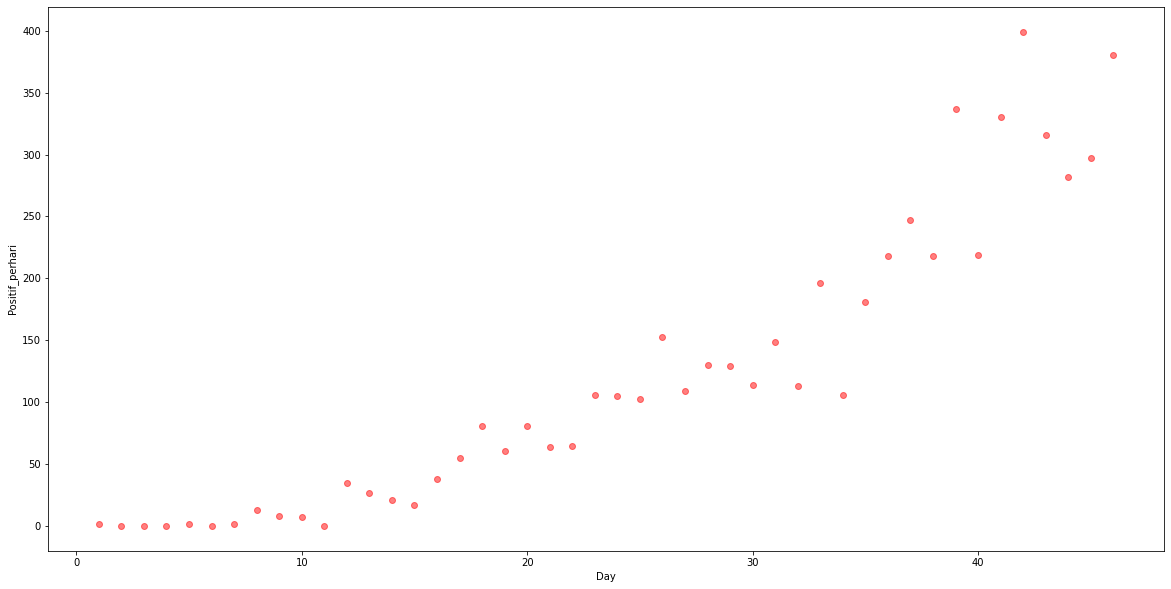

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

Day=[]
Positif_perhari=[]

for x in range(len(df_dataset)):
  Day.append(df_dataset.at[x,'Day'])
  Positif_perhari.append(df_dataset.at[x,'Positif_perhari'])

plt.figure(figsize=(20,10))
plt.scatter(Day,Positif_perhari, alpha=0.5, color='Red')
plt.xlabel('Day')
plt.ylabel('Positif_perhari')
plt.show()

**Memisahkan antara data training dan data test**

Data training yang dimaksut yaitu data dari tanggal 2 Maret sampai 16 April 2020, sedangkan data yang akan kita test yaitu data yang nantinya diprediksi pada tanggal 17 sampai 21 April 2020.

In [ ]:
regressor = np.random.rand(len(df_dataset)) < 0.9
train = df_dataset[regressor]
test = df_dataset[~regressor]

In [ ]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
X_train = np.asanyarray(train[['Day']])
Y_train = np.asanyarray(train[['Positif_perhari']])
regressor.fit(X_train, Y_train)
print ("Coefficients :" ,regressor.coef_ )
print ("Interrcept :" ,regressor.intercept_ )

Coefficients : [[8.21165928]]
Interrcept : [-71.93759353]


 **Tampilkan ke dalam bentuk Grafik**

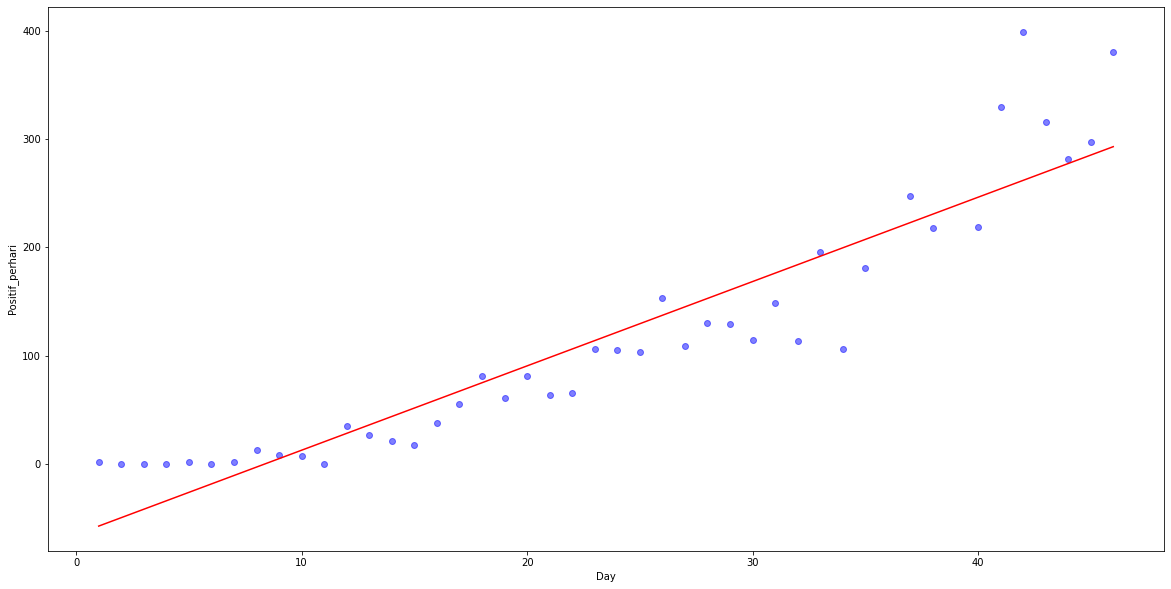

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(train.Day, train.Positif_perhari, alpha = 0.5, color ='Blue')
plt.plot(X_train,regressor.coef_[0][0]*X_train+regressor.intercept_[0],'r')
plt.xlabel('Day')
plt.ylabel('Positif_perhari')
plt.show()

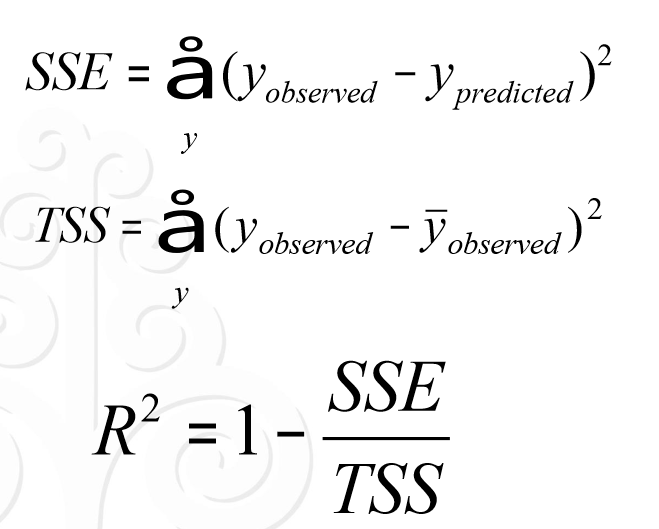

In [ ]:
X_test = np.asarray(test[['Day']])
Y_test = np.asarray(test[['Positif_perhari']])
Y_predict = regressor.predict(X_test)

sse = (Y_test-Y_predict)**2
tss = (Y_test-~Y_test)**2
r2 = 1-((Y_test-Y_predict)**2) / ((Y_test-~Y_test)**2)
print("Sum Squared Error: %.2f" % np.mean(sse))
print("Total Square: %.2f" % np.mean(tss))
print("R^2: %.2f" % np.mean(r2))

Sum Squared Error: 4860.38
Total Square: 323297.00
R^2: 0.99


**Prediksi**

Lalu kita prediksi jumlah positif perhari nya untuk 5 hari kedepan 

In [ ]:
intercept_ = -64.53345979
coef_ = 7.85527378

positif1 = intercept_ + coef_ * 47
positif2 = intercept_ + coef_ * 48
positif3 = intercept_ + coef_ * 49
positif4 = intercept_ + coef_ * 50
positif5 = intercept_ + coef_ * 51

positif1,positif2,positif3,positif4,positif5

(304.66440787, 312.51968165, 320.37495543, 328.23022921, 336.08550299)

In [ ]:
positif0 = 5516

print ("Total Positif sampai tanggal 21 April adalah")
print ("17/4/2020 =", int(positif1+positif0))
print ("18/4/2020 =", int(positif1+positif2+positif0))
print ("19/4/2020 =", int(positif1+positif2+positif3+positif0))
print ("20/4/2020 =", int(positif1+positif2+positif3+positif4+positif0))
print ("21/4/2020 =", int(positif1+positif2+positif3+positif4+positif5+positif0))

Total Positif sampai tanggal 21 April adalah
17/4/2020 = 5820
18/4/2020 = 6133
19/4/2020 = 6453
20/4/2020 = 6781
21/4/2020 = 7117
